In [1]:
encrypted_text = "PRCSOFQX FP QDR AFOPQ CZSPR LA JFPALOQSKR. QDFP FP ZK LIU BROJZK MOLTROE."

A : Count the frequency of letters. List the top three most frequent characters. 

In [4]:
from collections import defaultdict

In [5]:
cnt = defaultdict(int)
for char in encrypted_text:
    if char.isalpha():
        cnt[char] += 1

In [8]:
top3 = sorted(cnt.items(), key=lambda x: x[1], reverse=True)
print(top3)

[('P', 7), ('R', 6), ('O', 6), ('F', 6), ('Q', 5), ('L', 4), ('S', 3), ('A', 3), ('Z', 3), ('K', 3), ('C', 2), ('D', 2), ('J', 2), ('X', 1), ('I', 1), ('U', 1), ('B', 1), ('M', 1), ('T', 1), ('E', 1)]


B : Knowing that this is English, what are commonly used three-letter words and 
two-letter words. Does the knowledge give you a hint on cracking the given 
text? 

In [ ]:
most_common3 = "the", "and", "for"
most_common2 = "an", "is", "it", "to", "of", "in"

Sure, it does because in encrypted sentence, it also have some 3-letter and 2-letter word, so it is a good start.

C: Cracking the given text. Measure the time that you have taken to crack this 
message. 

In [ ]:
encrypted_three = ["QDR", "LIU"]
encrypted_two = ["FP", "LA", "ZK"]

Try FP = is, because i found other encrypt is QDFP which have FP a part of it and is a starting word of sentense, so easily take it as "this", so now we got F = "i", P = "s", Q = "t", D = "h"

In [ ]:
print(ord("s") - ord("p"))  
print(ord("i") - ord("f"))  
print(ord("t") - ord("q"))  
print(ord("h") - ord("d"))  

3
3
3
4


At least we know it is not caesar cipher

In [25]:
cipher_map = {"F": "i", "P": "s", "Q": "t", "D": "h"}

In [26]:
decrypted_text = ""
for char in encrypted_text:
    if char in cipher_map:
        decrypted_text += cipher_map[char]
    else:
        decrypted_text += char
print(decrypted_text)

sRCSOitX is thR AiOst CZSsR LA JisALOtSKR. this is ZK LIU BROJZK MOLTROE.


In [27]:
cipher_map["R"] = "e"
# seCSOitX is the AiOst CZSse LA JisALOtSKe. this is ZK LIU BeOJZK MOLTeOE.

is must follow by noun, adj, the, a/an so lets try Zk as "an"

In [35]:
cipher_map["Z"] = "a"
cipher_map["K"] = "n"
# seCSOitX is the AiOst CaSse LA JisALOtSne. this is an LIU BeOJan MOLTeOE.
# try CaSse = "cause"
cipher_map["C"] = "c"
cipher_map["S"] = "u"
# secuOitX is the AiOst cause LA JisALOtune. this is an LIU BeOJan MOLTeOE.
# try security
cipher_map["O"] = "r"
cipher_map["X"] = "y"
# security is the Airst cause LA JisALrtune. this is an LIU BerJan MrLTerE.
# try first
cipher_map["A"] = "f"
# security is the first cause Lf JisfLrtune. this is an LIU BerJan MrLTerE.
# try of
cipher_map["L"] = "o"
# security is the first cause of Jisfortune. this is an oIU BerJan MroTerE.
# try misfortune
cipher_map["J"] = "m"

In [36]:
decrypted_text = ""
for char in encrypted_text:
    if char in cipher_map:
        decrypted_text += cipher_map[char]
    else:
        decrypted_text += char
print(decrypted_text)

security is the first cause of misfortune. this is an oIU Berman MroTerE.


In [38]:
import string
all_upper = set(string.ascii_uppercase)
all_lower = set(string.ascii_lowercase)

mapped_upper = set(cipher_map.keys())
mapped_lower = set(cipher_map.values())

unmapped_upper = all_upper - mapped_upper
unmapped_lower = all_lower - mapped_lower

print("Encrypt:", unmapped_upper)
print("Original:", unmapped_lower)

Encrypt: {'I', 'V', 'M', 'G', 'H', 'Y', 'U', 'N', 'W', 'E', 'T', 'B'}
Original: {'g', 'p', 'v', 'w', 'j', 'd', 'z', 'x', 'b', 'k', 'l', 'q'}


Using dictionary find old, german, and proverb

In [39]:
cipher_map["I"] = "l"
cipher_map["U"] = "d"
cipher_map["B"] = "g"
cipher_map["M"] = "p"
cipher_map["T"] = "v"
cipher_map["E"] = "b"

In [40]:
decrypted_text = ""
for char in encrypted_text:
    if char in cipher_map:
        decrypted_text += cipher_map[char]
    else:
        decrypted_text += char
print(decrypted_text)

security is the first cause of misfortune. this is an old german proverb.


Take about 20 minutes

D: Create a simple python program for cracking the Caesar cipher text using 
brute force attack. Explain the design and demonstrate your software.  
(You may use an English dictionary for validating results.) 


In [ ]:
# Caesar cipher is fixed shifted letters. so just shift from 1 to 25 and check with dictionary is enough
shifted_value = 0
while shifted_value <= 26:
    decrypted_text = ""
    for char in encrypted_text:
        if char.isalpha():
            base = ord('A') 
            shifted_char = chr((ord(char) - base + shifted_value) % 26 + base)
            decrypted_text += shifted_char
        else:
            decrypted_text += char
    print(f"Shift {shifted_value}: {decrypted_text}")
    shifted_value += 1

Shift 0: PRCSOFQX FP QDR AFOPQ CZSPR LA JFPALOQSKR. QDFP FP ZK LIU BROJZK MOLTROE.
Shift 1: QSDTPGRY GQ RES BGPQR DATQS MB KGQBMPRTLS. REGQ GQ AL MJV CSPKAL NPMUSPF.
Shift 2: RTEUQHSZ HR SFT CHQRS EBURT NC LHRCNQSUMT. SFHR HR BM NKW DTQLBM OQNVTQG.
Shift 3: SUFVRITA IS TGU DIRST FCVSU OD MISDORTVNU. TGIS IS CN OLX EURMCN PROWURH.
Shift 4: TVGWSJUB JT UHV EJSTU GDWTV PE NJTEPSUWOV. UHJT JT DO PMY FVSNDO QSPXVSI.
Shift 5: UWHXTKVC KU VIW FKTUV HEXUW QF OKUFQTVXPW. VIKU KU EP QNZ GWTOEP RTQYWTJ.
Shift 6: VXIYULWD LV WJX GLUVW IFYVX RG PLVGRUWYQX. WJLV LV FQ ROA HXUPFQ SURZXUK.
Shift 7: WYJZVMXE MW XKY HMVWX JGZWY SH QMWHSVXZRY. XKMW MW GR SPB IYVQGR TVSAYVL.
Shift 8: XZKAWNYF NX YLZ INWXY KHAXZ TI RNXITWYASZ. YLNX NX HS TQC JZWRHS UWTBZWM.
Shift 9: YALBXOZG OY ZMA JOXYZ LIBYA UJ SOYJUXZBTA. ZMOY OY IT URD KAXSIT VXUCAXN.
Shift 10: ZBMCYPAH PZ ANB KPYZA MJCZB VK TPZKVYACUB. ANPZ PZ JU VSE LBYTJU WYVDBYO.
Shift 11: ACNDZQBI QA BOC LQZAB NKDAC WL UQALWZBDVC. BOQA QA KV WTF MCZUKV XZWECZP.
Sh

2 : The viginere cipher is a polyalphabetic substitution cipher. Using keyword to determine how much each letter of the plaintext is shifted. 

Why Kasiski examination can used to attack Vigenere. because Vigenere repeat the keyword. If the same sequence of plaintext align on same keyword. The ciphertext will also repeat -> so the idea is finding a repeated pattern in the ciphertext -> then we can use to guess the keyword length by using gcd because it have a chance that same pattern might came from different pair of key and plaintext so using gcd to care about it -> Once we got keyword length we can separate ciphertext into separated group each group will looklike the simple caesar cipher -> just use a simple program then we got it.

3:

Original Image:


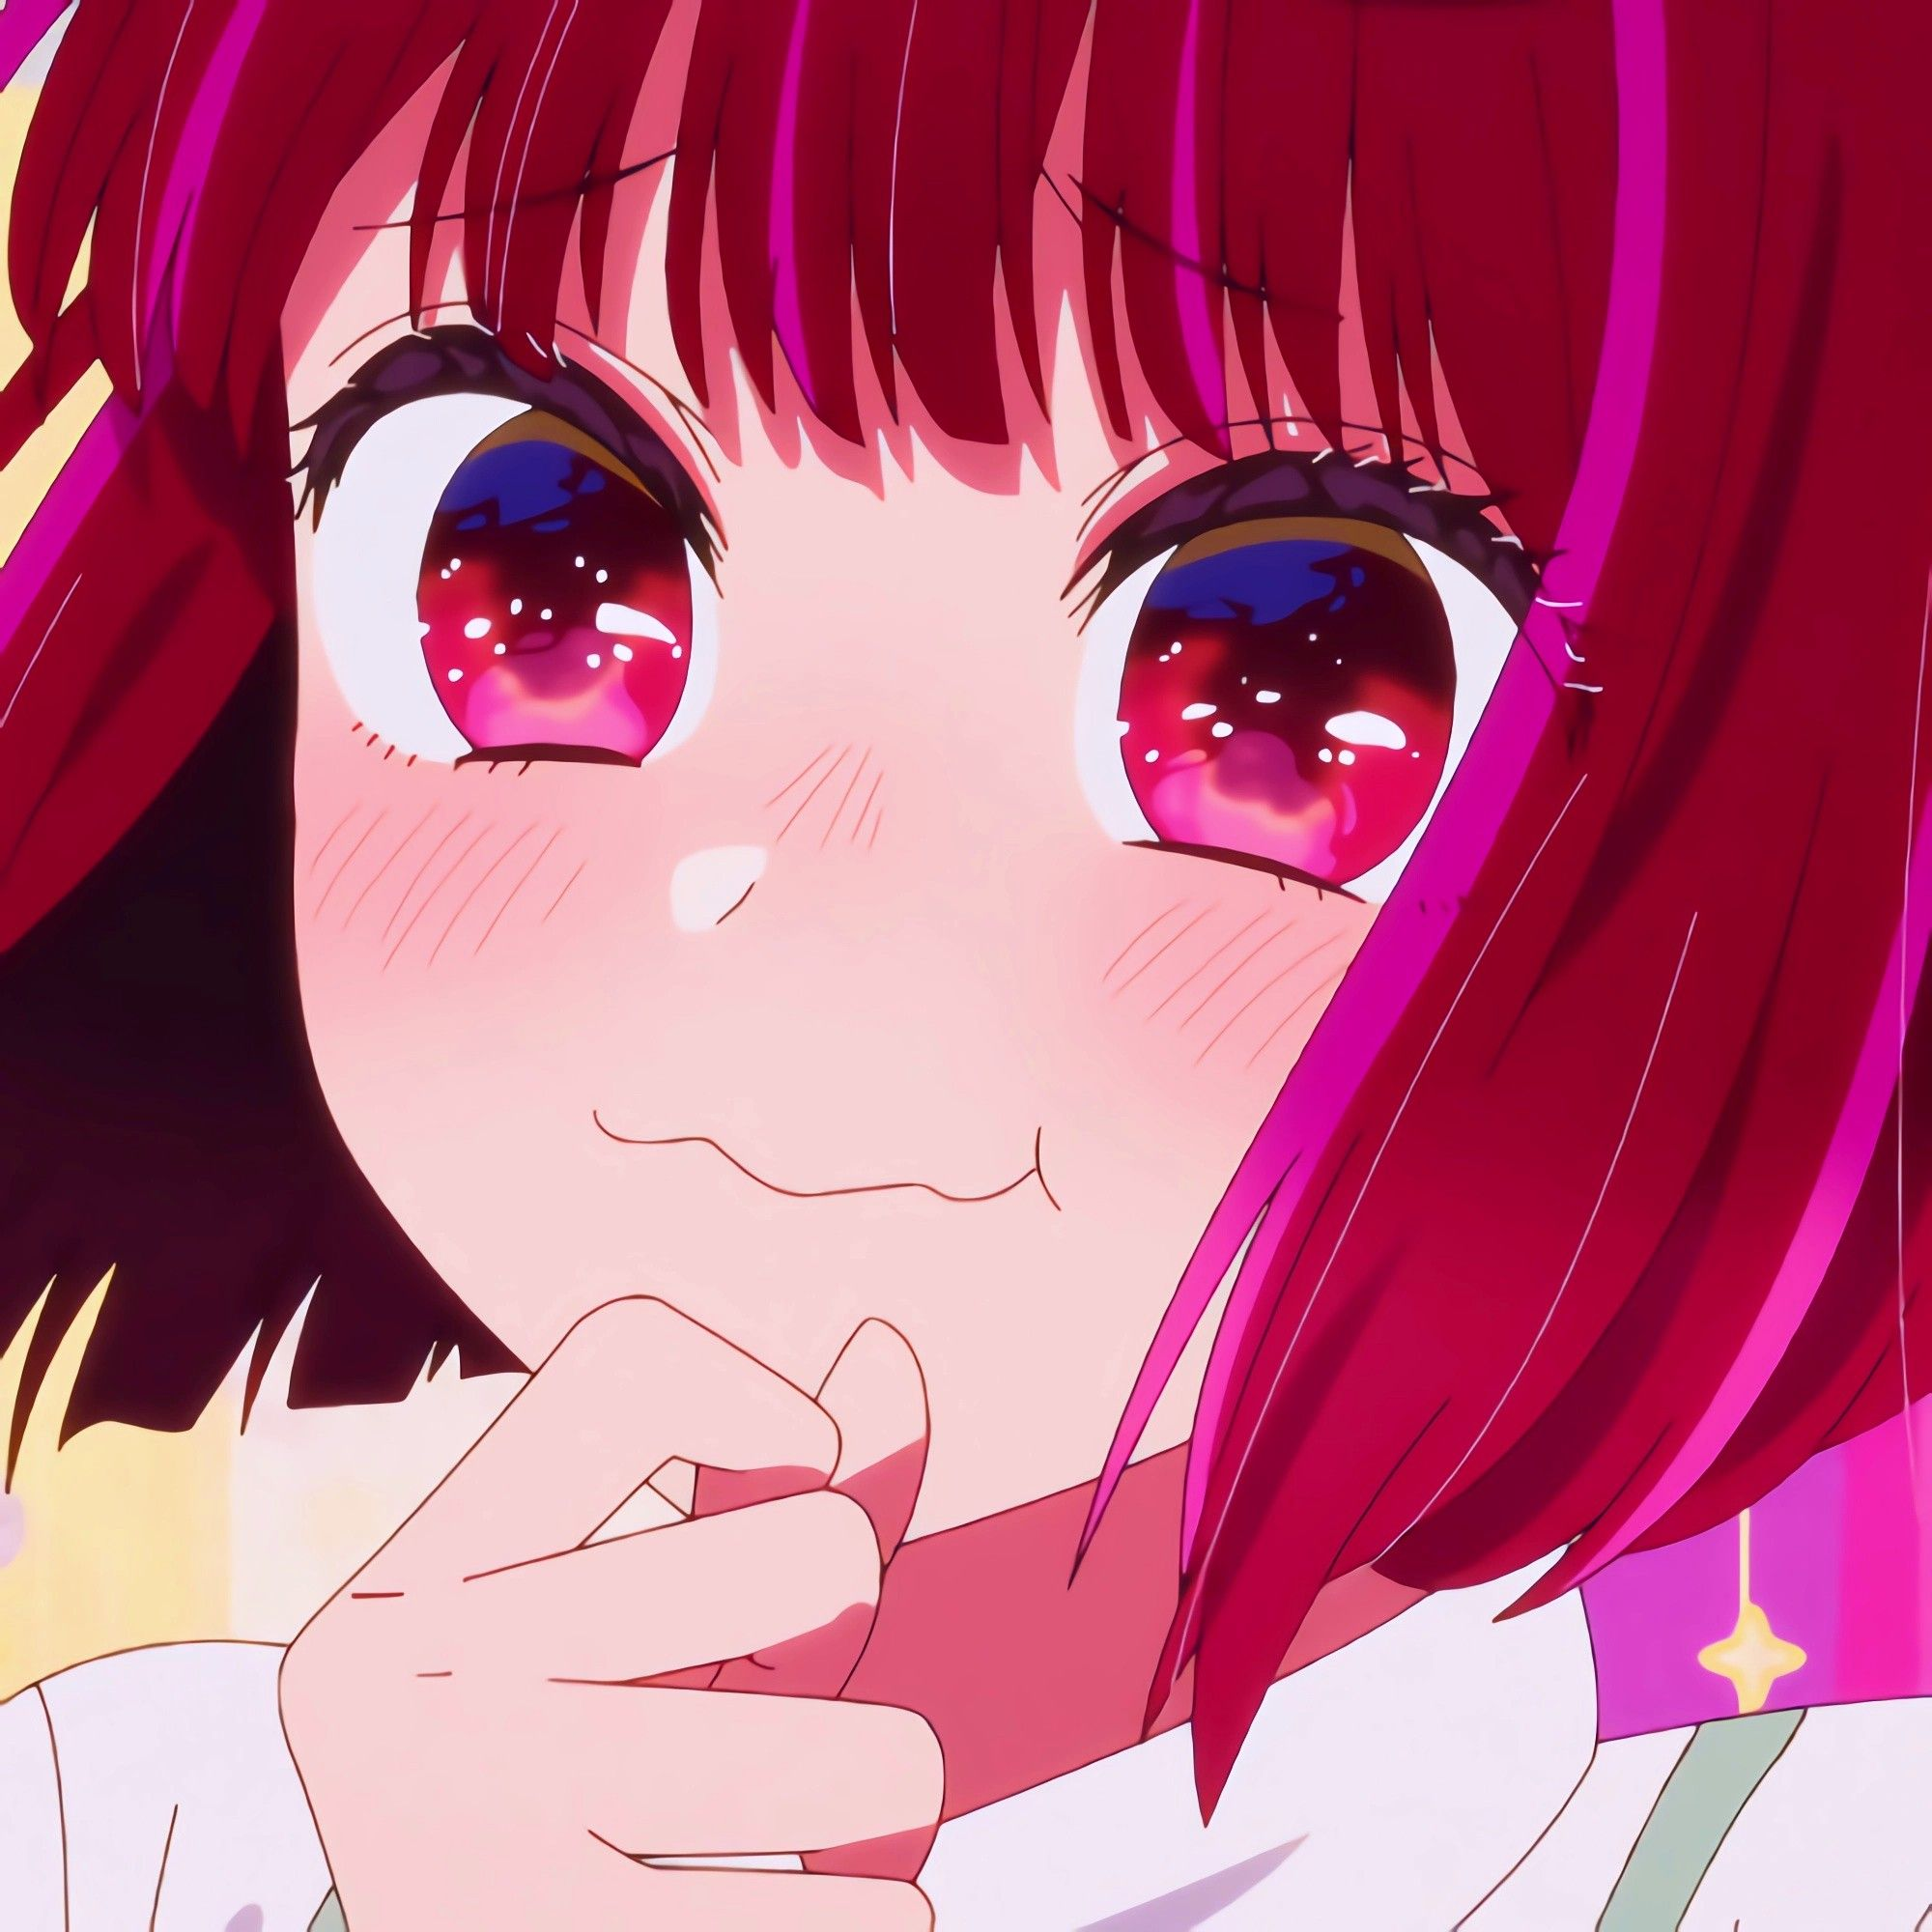

AES-256-ECB:


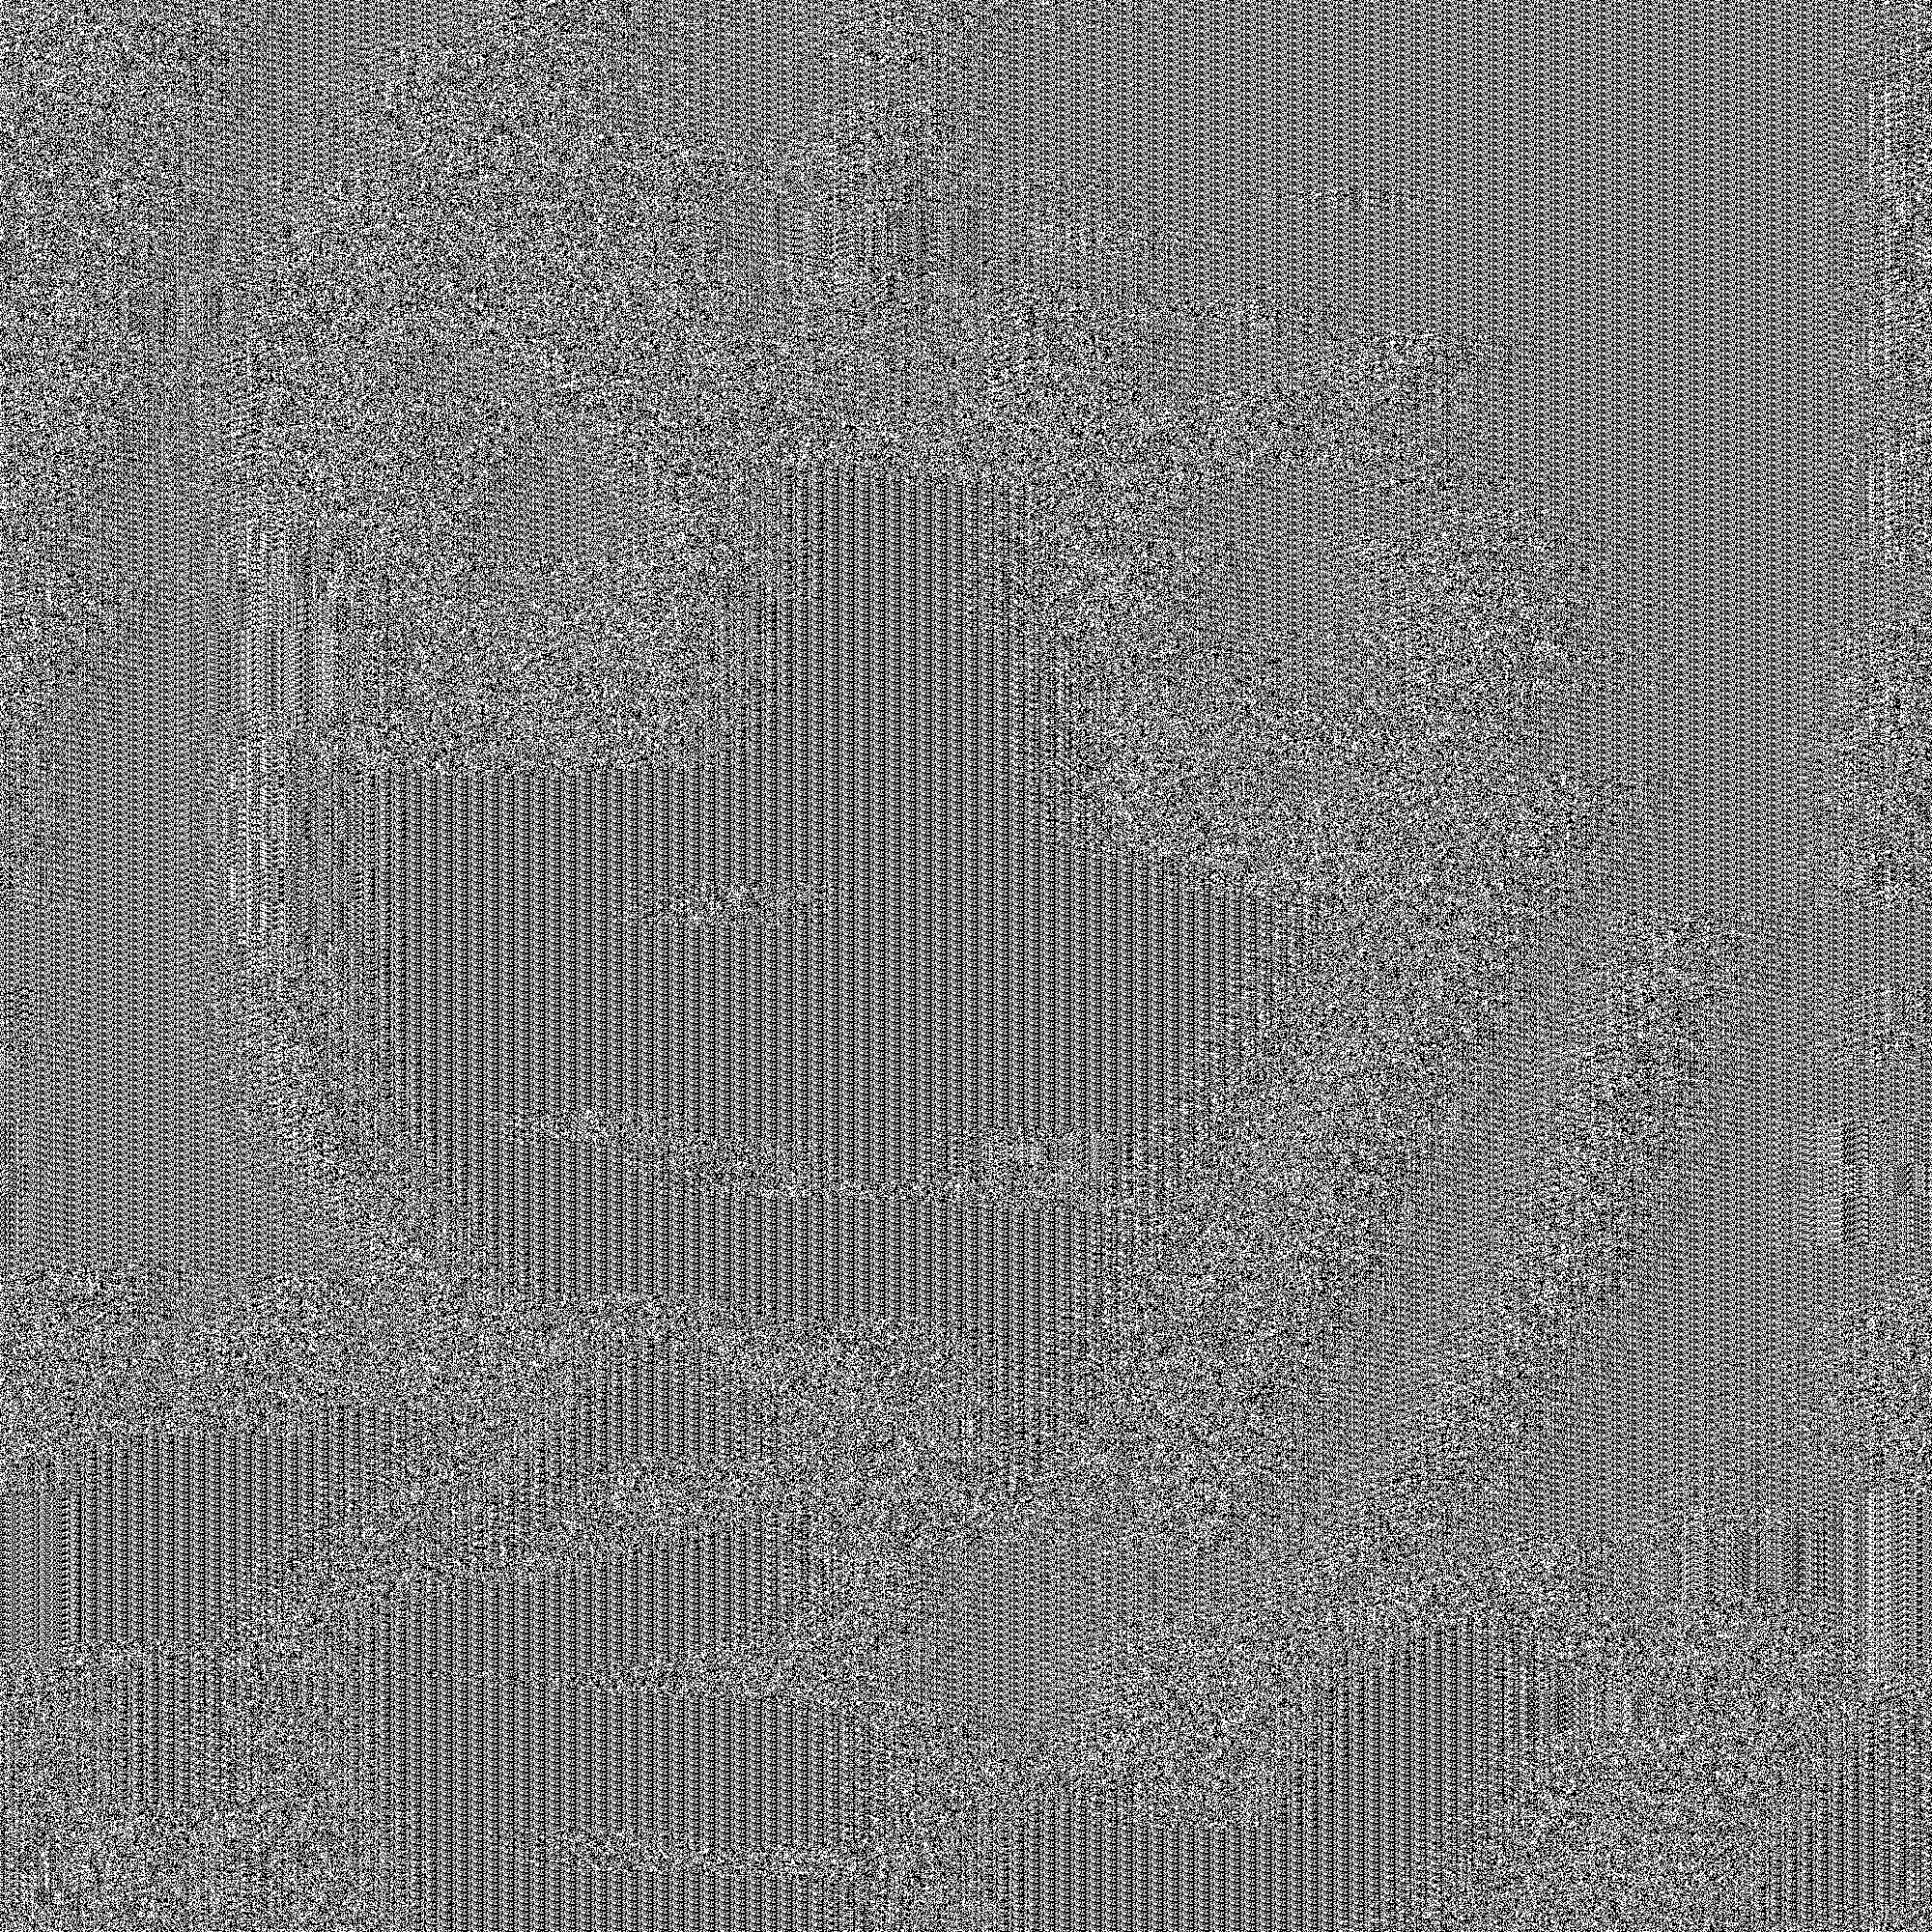

AES-256-CBC:


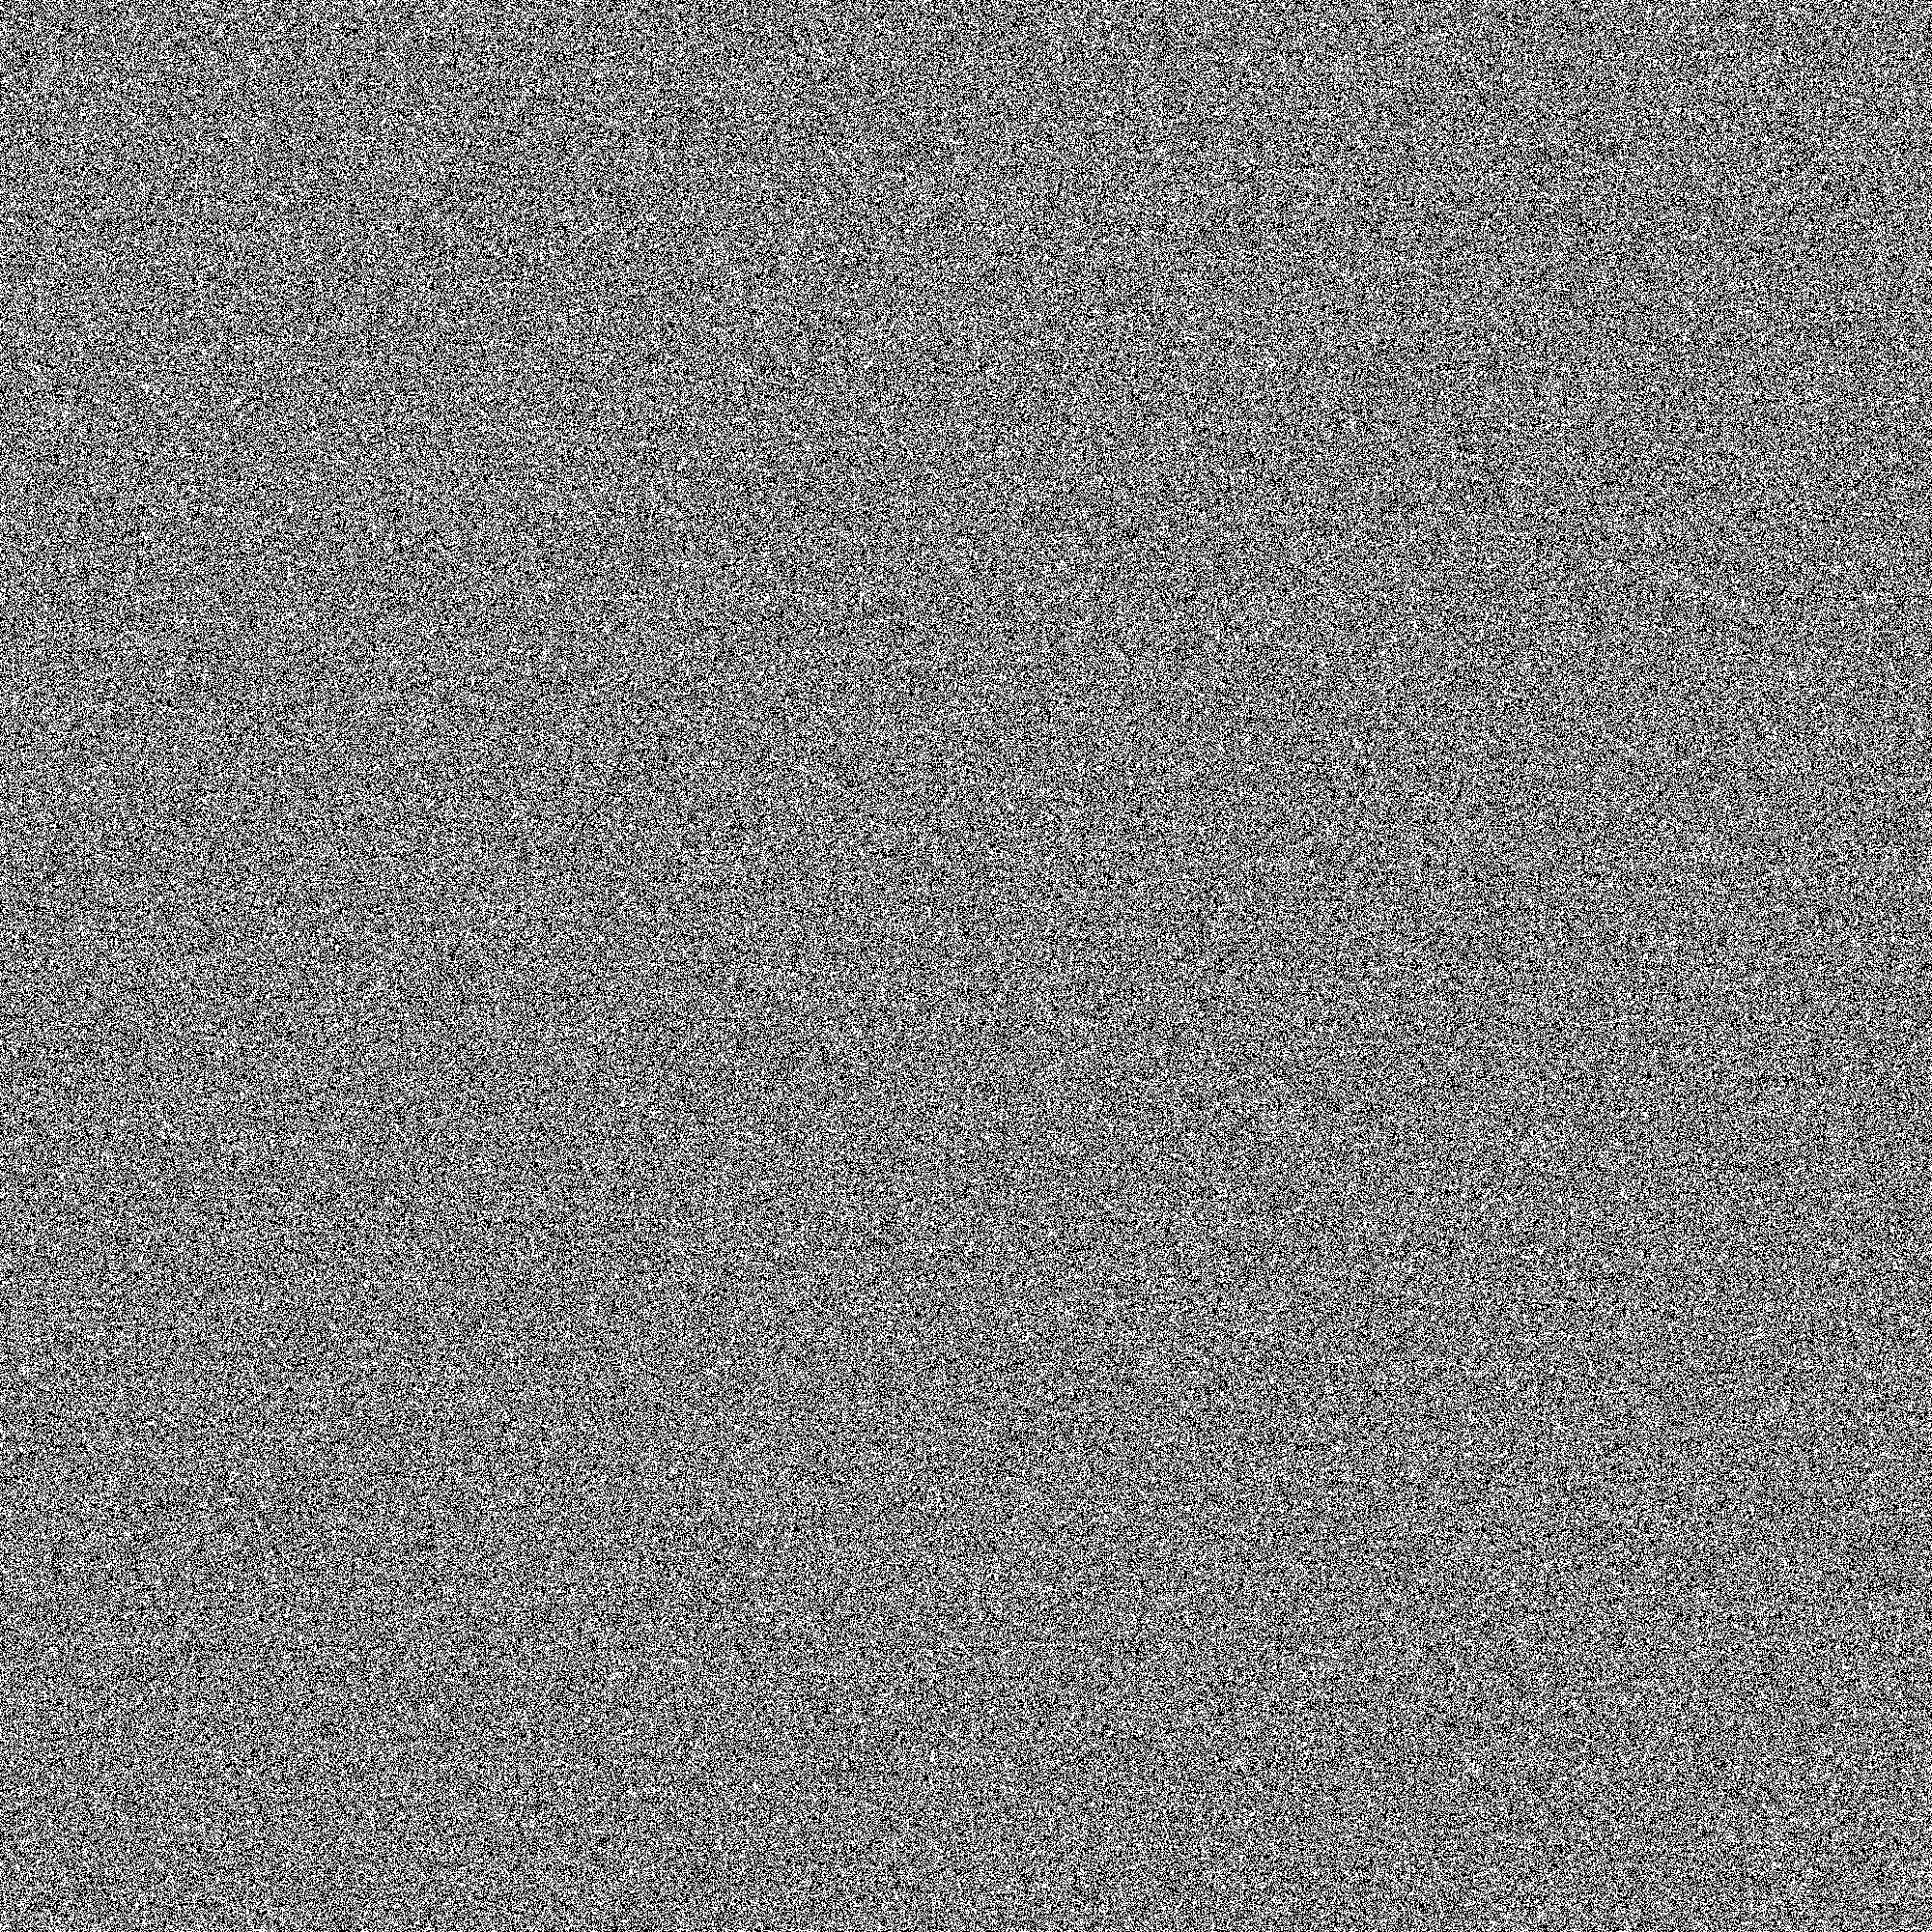

In [10]:
from IPython.display import Image, display

files = ["image.jpg", "out.jpg", "out2.jpg"]

print("Original Image:")
display((Image(filename="image.jpg")))
print("AES-256-ECB:")
display((Image(filename="out.jpg")))
print("AES-256-CBC:")
display((Image(filename="out2.jpg")))

3F : The results show that the mode of operation determines whether a block cipher hides patterns effectively. 

In ECB mode, identical plaintext block will produce identical ciphertext block, so patterns remain visible in the encrypted image. 

In CBC which also combining chaining and IV eliminate visible structure effectively, produce ciphertext that looks random. 

In conclusion, ECB mode is insecure for practical use, and block cipher security relies heavily on the chosen mode of operation.

Experiment outline : using openssl is enough. cuase it didnot only show 1 times but the number of operations in a fixed time window so it is already average.

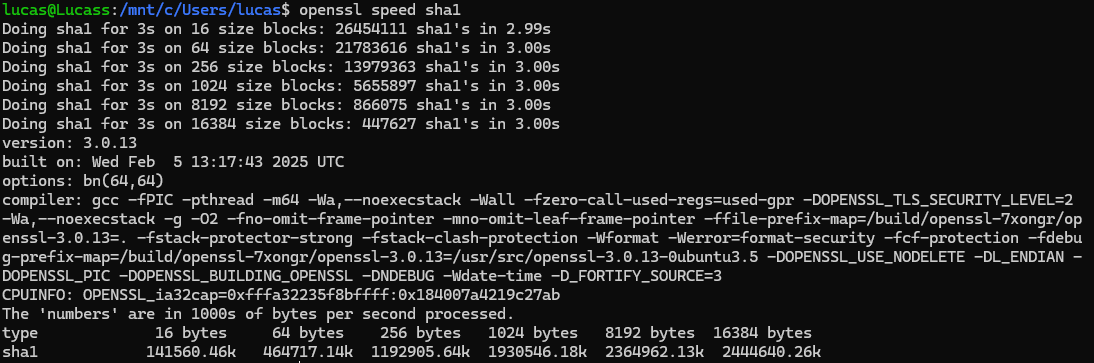

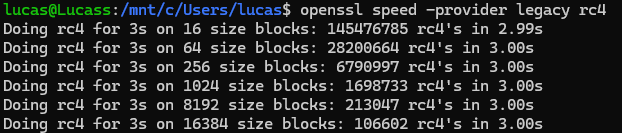

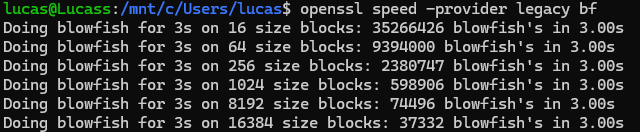

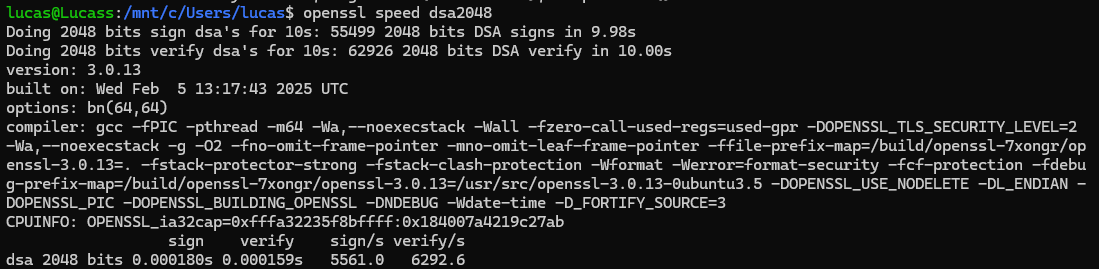

Speed in 16K : SHA1 > RC4 > Blowfish >> DSA (most slow one)

Security : SHA-1 ≈ RC4  <<  Blowfish  <  DSA

## Mechanism
### Hashing

- The sender first computes a hash of the message.

- Purpose: reduce message size to a fixed, small output → faster to sign.

### Signing (Asymmetric crypto)

- The sender encrypts the hash with their private key (RSA, DSA, etc...).

- Get the digital signature.

- Send both message and signature.

### Verification

- Receiver recomputes the hash of the received message.

- Receiver uses sender’s public key to decrypt the signature and recover the signed hash.

### last step

- If both hashes match → message is authentic and untampered.

## Combined Strength
##### Hash Function : very fast, and got fixed result even huge message can be efficiently signed.
##### Signing : authentication, but slow
##### Combination : didnot sign huge message but just fixed short size hash
##### Weakness that got overcome 
- asymmetric is slow so signing only hash
- hash cant prove identity but signature can